### Adithya Nair
### Roll No: AM.EN.U4CSE19103

## Trying Different Regression Models on the Life Expectancy dataset

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Reading the Life Expectancy dataset, using pandas.

In [411]:
df = pd.read_csv("life-expectancy.csv")
df

,Entity,Code,Year,Life expectancy (years)
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


Dataset Link: https://www.kaggle.com/prateekmaj21/lifeexpectancy


Checking the types of the features and the number of non-null examples. There are missing values on every feature, before feeding the dataset to the model, they need to be dealt.

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19028 entries, 0 to 19027
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   19028 non-null  object 
 1   Code                     18445 non-null  object 
 2   Year                     19028 non-null  int64  
 3   Life expectancy (years)  19028 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 594.8+ KB


Describing the dataset. The dataset consists of examples from 193 different countries from different years. It is shown that minimum value for year is 1881 and maximum is 2019. Also the status column is binary, can be converted to 1 and 0s. The population column has huge values in it, which is expected. The values can be showed as millions.

In [413]:
df.describe(include='all')

,Entity,Code,Year,Life expectancy (years)
count,19028,18445,19028.000000,19028.000000
unique,243,235,NaN,NaN
top,Sweden,SWE,NaN,NaN
freq,269,269,NaN,NaN
mean,NaN,NaN,1974.955171,61.751767
std,NaN,NaN,38.157409,13.091632
min,NaN,NaN,1543.000000,17.760000
25%,NaN,NaN,1961.000000,52.314750
50%,NaN,NaN,1980.000000,64.713000
75%,NaN,NaN,2000.000000,71.984250


Droping the feature with missing values

In [414]:
df = df.drop('Code',axis=1)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19028 entries, 0 to 19027
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   19028 non-null  object 
 1   Year                     19028 non-null  int64  
 2   Life expectancy (years)  19028 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 446.1+ KB


In [416]:
df['Life expectancy (years)']

0        27.638
1        27.878
2        28.361
3        28.852
4        29.350
          ...  
19023    59.534
19024    60.294
19025    60.812
19026    61.195
19027    61.490
Name: Life expectancy (years), Length: 19028, dtype: float64

### Life Expectancy Of India (1881 - 2019)

In [417]:
India = df[df['Entity'] == 'India']
India

,Entity,Year,Life expectancy (years)
7691,India,1881,25.442400
7692,India,1891,24.266399
7693,India,1901,23.485600
7694,India,1905,23.980000
7695,India,1911,23.146400
...,...,...,...
7767,India,2015,68.607000
7768,India,2016,68.897000
7769,India,2017,69.165000
7770,India,2018,69.416000


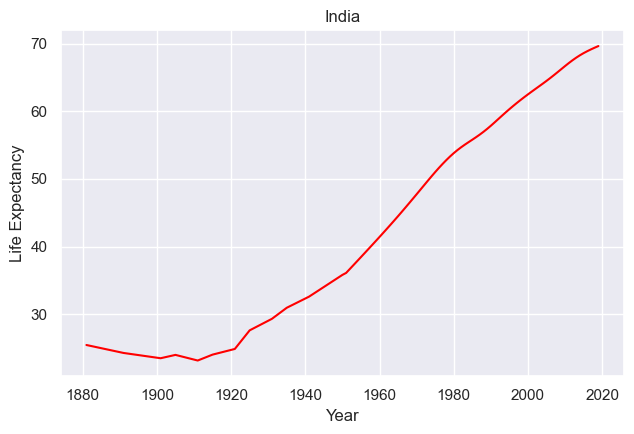

In [418]:
plt.plot(India['Year'], India['Life expectancy (years)'], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title("India")
plt.show()


This plot shows that India's life expectancy was below 30 at year 1881 and hit the top with 70 at 2019. Then it increases lineary.


This dataframe shows the countries with lowest and highest life expectancy. We can see African countries generally have the lowest life expectancy and the European ones have the highest.

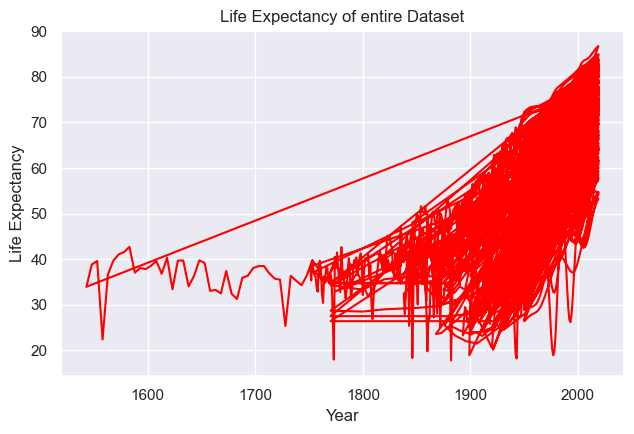

In [419]:
plt.plot(df['Year'], df['Life expectancy (years)'], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title("Life Expectancy of entire Dataset")
plt.show()

In [420]:
df.sort_values('Life expectancy (years)')

,Entity,Year,Life expectancy (years)
7553,Iceland,1882,17.760000
16062,Sweden,1773,17.959999
17595,Ukraine,1943,18.200001
7517,Iceland,1846,18.320000
4059,Cuba,1899,18.900000
...,...,...,...
11001,Monaco,2015,85.739000
11002,Monaco,2016,86.049000
11003,Monaco,2017,86.325000
11004,Monaco,2018,86.560000


### Label Encoding Countries

In [421]:
l_encoder= preprocessing.LabelEncoder()
df['labels'] = l_encoder.fit_transform(df.loc[:, 'Entity'])
df

,Entity,Year,Life expectancy (years),labels
0,Afghanistan,1950,27.638,0
1,Afghanistan,1951,27.878,0
2,Afghanistan,1952,28.361,0
3,Afghanistan,1953,28.852,0
4,Afghanistan,1954,29.350,0
...,...,...,...,...
19023,Zimbabwe,2015,59.534,242
19024,Zimbabwe,2016,60.294,242
19025,Zimbabwe,2017,60.812,242
19026,Zimbabwe,2018,61.195,242


In [422]:
df[df['Entity'] == 'United States']

,Entity,Year,Life expectancy (years),labels
17980,United States,1880,39.410000,229
17981,United States,1890,45.209999,229
17982,United States,1901,49.299999,229
17983,United States,1902,50.500000,229
17984,United States,1903,50.599998,229
...,...,...,...,...
18096,United States,2015,78.910000,229
18097,United States,2016,78.885000,229
18098,United States,2017,78.861000,229
18099,United States,2018,78.851000,229


In [423]:
df['Life expectancy (years)']

0        27.638
1        27.878
2        28.361
3        28.852
4        29.350
          ...  
19023    59.534
19024    60.294
19025    60.812
19026    61.195
19027    61.490
Name: Life expectancy (years), Length: 19028, dtype: float64

## Data Visualization

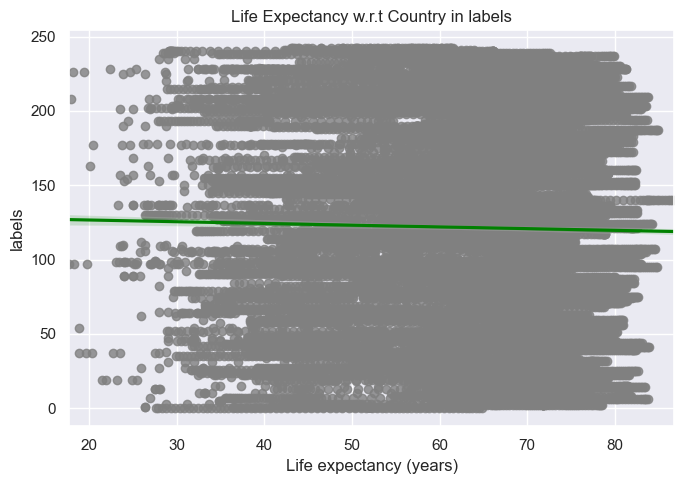

In [424]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.regplot(y="labels", x="Life expectancy (years)", data=df, scatter_kws={"color": "gray"}, line_kws={"color": "green"})
plt.title("Life Expectancy w.r.t Country in labels")
plt.show()

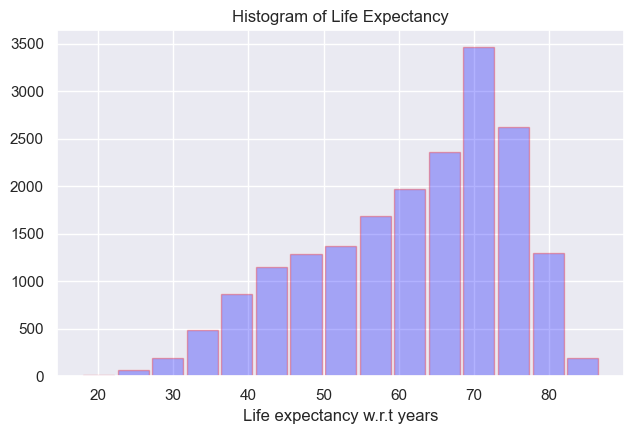

In [425]:
plt.hist(df['Life expectancy (years)'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Life expectancy w.r.t years') 
#plt.ylabel('Year') 

#plot title 
plt.title('Histogram of Life Expectancy') 
plt.show();

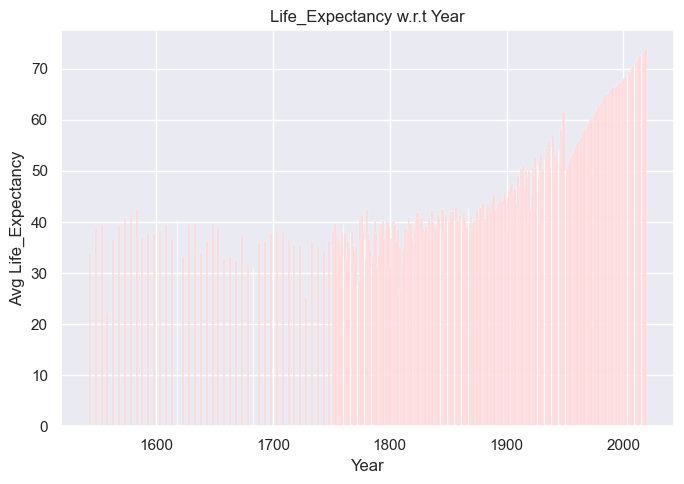

In [426]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index, df.groupby('Year')['Life expectancy (years)'].mean(),color='red',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

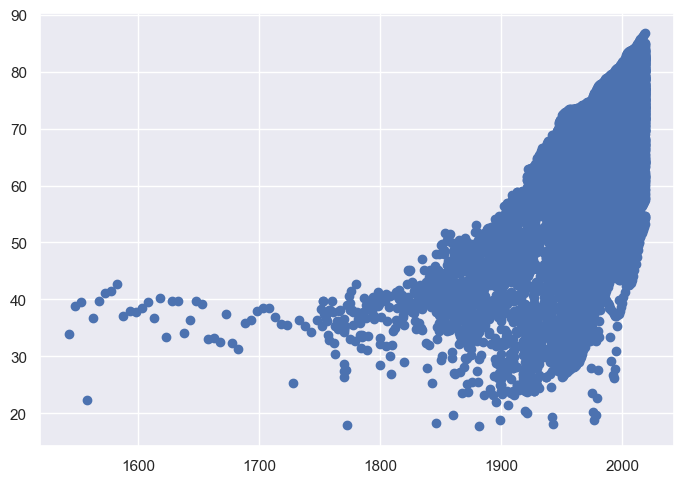

In [427]:
plt.figure(figsize=(7,5))
plt.scatter(x='Year', y='Life expectancy (years)', data=df)
plt.show()

<Figure size 700x500 with 0 Axes>

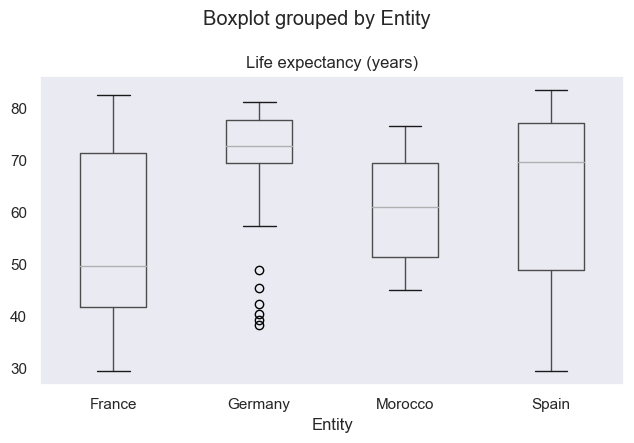

In [428]:
plt.figure(figsize=(7,5))
df[df.Entity.isin(['Morocco','Germany','Spain','France'])].boxplot(by='Entity', 
                       column=['Life expectancy (years)'], 
                       grid=False)
plt.show()

## Data Normalization

In [429]:
y = df['Life expectancy (years)']
df = df.drop(labels='Life expectancy (years)', axis=1)
df

,Entity,Year,labels
0,Afghanistan,1950,0
1,Afghanistan,1951,0
2,Afghanistan,1952,0
3,Afghanistan,1953,0
4,Afghanistan,1954,0
...,...,...,...
19023,Zimbabwe,2015,242
19024,Zimbabwe,2016,242
19025,Zimbabwe,2017,242
19026,Zimbabwe,2018,242


In [430]:
y

0        27.638
1        27.878
2        28.361
3        28.852
4        29.350
          ...  
19023    59.534
19024    60.294
19025    60.812
19026    61.195
19027    61.490
Name: Life expectancy (years), Length: 19028, dtype: float64

In [431]:
y = y.to_numpy(dtype='float64')
y

array([27.638, 27.878, 28.361, ..., 60.812, 61.195, 61.49 ])

In [432]:
X = df
X

,Entity,Year,labels
0,Afghanistan,1950,0
1,Afghanistan,1951,0
2,Afghanistan,1952,0
3,Afghanistan,1953,0
4,Afghanistan,1954,0
...,...,...,...
19023,Zimbabwe,2015,242
19024,Zimbabwe,2016,242
19025,Zimbabwe,2017,242
19026,Zimbabwe,2018,242


In [433]:
X = X.drop(labels=['Entity'],axis=1)

In [434]:
X

,Year,labels
0,1950,0
1,1951,0
2,1952,0
3,1953,0
4,1954,0
...,...,...
19023,2015,242
19024,2016,242
19025,2017,242
19026,2018,242


## Splitting dataset into Train - Test

In [482]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.67, random_state=42)

In [483]:
X_train

,Year,labels
11389,1982,146
18488,1977,235
17483,1987,224
2476,1991,32
4248,1982,56
...,...,...
11284,2018,144
11964,1962,153
5390,1983,70
860,2013,11


In [484]:
Y_train

array([53.726, 67.723, 60.868, ..., 71.844, 74.056, 69.079])

### Preprocessing - Standardization

In [485]:
from sklearn import preprocessing, linear_model, model_selection, metrics

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [486]:
X_train

array([[ 0.16898081,  0.33729351],
       [ 0.03817349,  1.60510994],
       [ 0.29978814,  1.44841353],
       ...,
       [ 0.19514228, -0.74533624],
       [ 0.97998622, -1.58579882],
       [ 0.24746521,  1.16351096]])

###  Mean Absolute Error Function

In [468]:
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Models

### 1. KNN Regressor from Scratch

In [441]:
def euclid_distance(a,b):
        dist = (a-b)**2
        return np.sqrt(np.sum(dist))

In [442]:
class KNeighbourRegressor():
    
    def __init__(self,k):
        self.k = k
    
    def fit(self,X,y):
        
        self.X_train = X
        self.y_train = y
      
    def predictions(self,x):
        
        distances = [euclid_distance(x,x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        y_pred = np.mean(k_nearest_labels)
        
        return y_pred
    
        
    def predict(self,X):
        
        predicted_labels = [self.predictions(x) for x in X]
            
        return np.array(predicted_labels)

### 2. Linear Regression from Scratch

In [469]:
class LinearRegression:
    def __init__(self,X,Y):
        self.X_train = X
        self.y_train = Y
        
    def gradient_descent(self,x, y, iter = 100, lr = 0.08):
        m, n, b = np.zeros(x.shape[1]), (-2*lr)/x.shape[0], 0
        for _ in range(iter):
            yd = [j-(sum(m*i)+b) for i, j in zip(x, y)]
            m -= n*sum([i*j for i,j in zip(x, yd)])
            b -= n*sum(yd)
        return m, b
    
    def fit(self,x, y):
        coef,intercept = self.gradient_descent(x, y)
        return coef,intercept
    
    def predict(self,x):
        m,b = self.fit(self.X_train,self.y_train)

        return np.dot(x,m) + b

### 3. SVR - Inbuilt

In [470]:
from sklearn.svm import SVR
svrRegressor= SVR()



### Cross Validation Using KFold

In [471]:
from sklearn.model_selection import KFold

In [472]:
def kfold(x,y,model):
    
    res = []
    
    model_accuracies = []
    
    kf = KFold(n_splits = 5)
    
    for train_index, test_index in kf.split(x):
        
        X_train, X_valid = x[train_index], x[test_index]
        Y_train, Y_valid = y[train_index], y[test_index]

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_valid)
        
        score = metrics.r2_score(Y_valid, Y_pred)
        model_accuracies.append(score)
        res.append(score)
        
    return res,(sorted(model_accuracies)[-1])

### KNN - Highest Validation Accuracy

In [451]:
KNN = KNeighbourRegressor(7)
best_KNN, best_out = kfold(X_train,Y_train,KNN)
print("KNN:",best_out)


KNN: 0.5142345395284846


### Linear Regression - Highest Validation Accuracy

In [473]:
LR = LinearRegression(X_train,Y_train)
best_LR, best_out = kfold(X_train,Y_train,LR)
print("LR:",best_out)


LR: 0.3723386358958235


### Support Vector Regression - Highest Validation Accuracy

In [474]:
best_SVR, best_out = kfold(X_train,Y_train,svrRegressor)
print("SVR:",best_out)


SVR: 0.40340959133565946


## TESTING SECTION

### Finding The Best Model Using Test Data

### Linear Regression - Testing

##### Using Mean Absolute Error we find the error and accuracy of the respective regressor

In [475]:
y_pred_LR = LR.predict(X_test)

In [476]:
metrics.r2_score(Y_test, y_pred_LR)

0.3378395132388059

In [477]:
LR_MAE = MAPE(Y_test,y_pred_LR)
Accuracy_LR = 100 - LR_MAE
print("MAE: ",LR_MAE)
print('Accuracy of LR model: {:0.2f}%.'.format(Accuracy_LR))

MAE:  16.440178993153303
Accuracy of LR model: 83.56%.


### KNN - Testing

In [ ]:
y_pred_KNN = KNN.predict(X_test)

In [457]:
metrics.r2_score(Y_test, y_pred_KNN)

0.4720208842940671

In [458]:
KNN_MAE = MAPE(Y_test,y_pred_KNN)
Accuracy_KNN = 100 - KNN_MAE
print("Mean Absolute Error: ",KNN_MAE)
print('Accuracy of KNN model: {:0.2f}%.'.format(Accuracy_KNN))

Mean Absolute Error:  13.934746811371479
Accuracy of KNN model: 86.07%.


### SVR - Testing

In [478]:
y_pred_svr= svrRegressor.predict(X_test)

In [479]:
metrics.r2_score(Y_test, y_pred_svr)

0.3593466749746298

In [480]:
SVR_MAE = MAPE(Y_test,y_pred_svr)
Accuracy_SVR = 100 - SVR_MAE
print("MAE: ",SVR_MAE)
print('Accuracy of SVR model: {:0.2f}%.'.format(Accuracy_SVR))

MAE:  15.611417698168639
Accuracy of SVR model: 84.39%.


KNN Model has the highest accuracy of 86 %

Box Plot Comparison

In [375]:
print(best_KNN)
print(best_LR)
print(best_SVR)

[0.4355629784140892, 0.49813443172974026, 0.4853452146308609, 0.4225520181106218, 0.4439978831405893]
[0.3505367563673656, 0.381399158980658, 0.35501731251480384, 0.33679176851799686, 0.32762423555719977]
[0.3864928007034887, 0.4003893046163828, 0.38223262341234376, 0.35246260157124476, 0.3538477475511208]


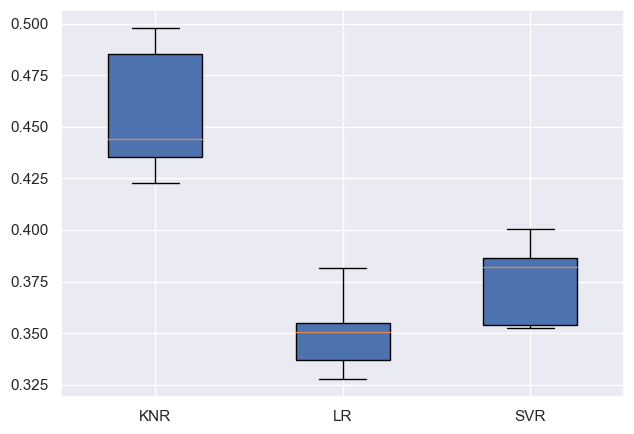

In [378]:
plt.rcParams["figure.figsize"] = [6.50, 4.50]
plt.rcParams["figure.autolayout"] = True

box_plot_data=[best_KNN,best_LR,best_SVR]
plt.boxplot(box_plot_data,patch_artist=True,labels=['KNR','LR','SVR'],widths=(0.5, 0.5, 0.5))
plt.show() 

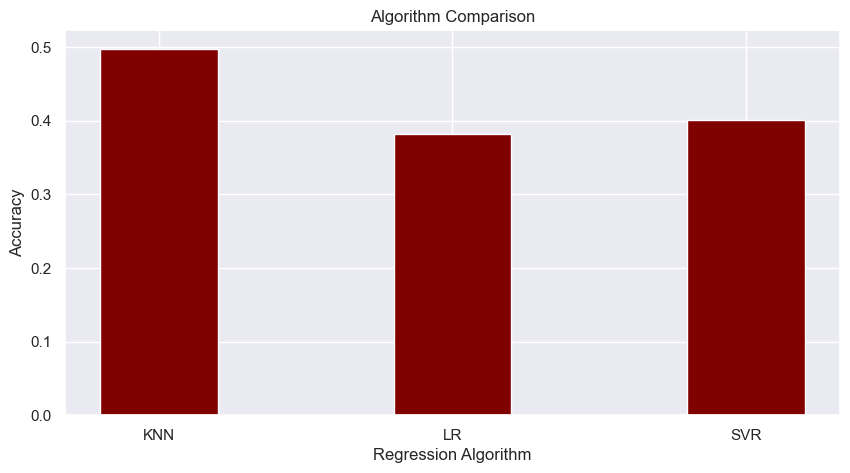

In [366]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4 )
 
plt.xlabel("Regression Algorithm")
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison")
plt.show()

### Plot accuracy for different values of k.

In [487]:
acc_score = []
k_values = []

for k in range(1,20,2):

    KNN = KNeighbourRegressor(k)
    _,best_out = kfold(X_train,Y_train,KNN)
    acc_score.append(best_out)
    k_values.append(k)

In [488]:
print(acc_score,' - ', k_values)


[0.31010311992839035, 0.4673598562521022, 0.5028770926833546, 0.5115079293745468, 0.49936600128899755, 0.48342673317656115, 0.48298006450601827, 0.48642285473190217, 0.48431858871988875, 0.4812671214848221]  -  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


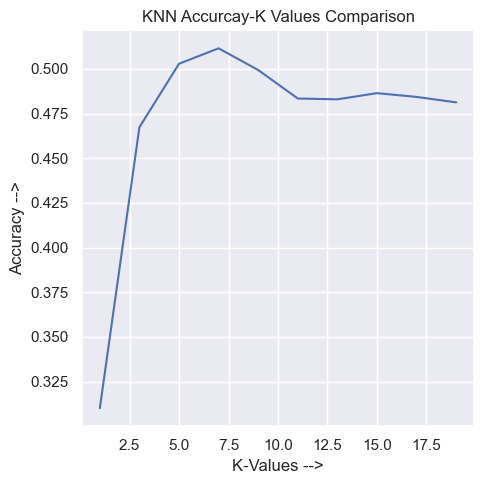

In [492]:
fig = plt.figure(figsize = (5, 5))
plt.plot(k_values,acc_score)

plt.xlabel('K-Values -->')
plt.ylabel('Accuracy -->')
plt.title('KNN Accurcay-K Values Comparison')
plt.show()

#### from the above model, we can see that the accuracy increases for KNN regressor till 7 neighbours and then it decreases as the number of neighbours increases.

### Predicting new data with the best model - KNN

In [460]:
tester = np.array([[2019,229]])
tester

array([[2019,  229]])

In [461]:
tester = scaler.transform(tester)
tester

array([[1.13077776, 1.51866747]])

#### Life Expectancy - United States - 2019

In [462]:
out = KNN.predict(tester)
out

array([77.344])

## Actual Life Expectancy

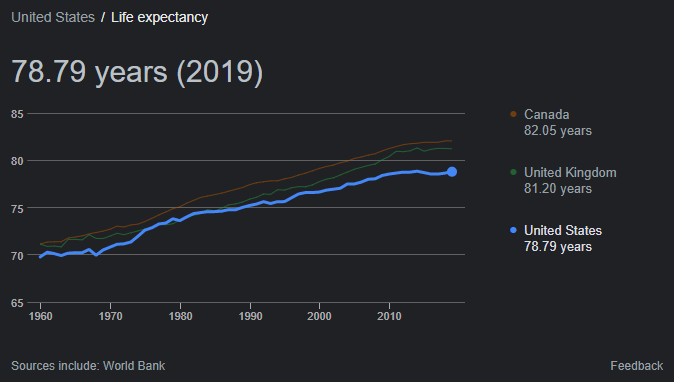

#### Life Expectancy of United States is 78.79 in 2019 while the KNN regressor predicted the life expectancy as 77.34. The slight change in value is because of the reduced accuracy of the KNN model.